In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [31]:
train_df=pd.read_csv("../input/trailblazers-open-to-all-qualification-challenge/Train (3).csv")
test_df=pd.read_csv("../input/trailblazers-open-to-all-qualification-challenge/Test (5).csv")
sub=pd.read_csv("../input/trailblazers-open-to-all-qualification-challenge/SampleSubmission (1).csv")

In [32]:
train_df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
test_df.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [34]:
Id=test_df["Place_ID X Date"]

In [35]:
train_df.shape

(30557, 82)

In [36]:
test_df.shape

(16136, 77)

In [37]:
test_df.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [38]:
L=[i for i in train_df.columns if i not in test_df.columns]

In [39]:
L

['target', 'target_min', 'target_max', 'target_variance', 'target_count']

In [40]:
train_df["target"].nunique()

375

In [41]:
train_df.isna().sum().sort_values(ascending =False).head(20)

L3_CH4_solar_zenith_angle                              24765
L3_CH4_solar_azimuth_angle                             24765
L3_CH4_sensor_zenith_angle                             24765
L3_CH4_sensor_azimuth_angle                            24765
L3_CH4_aerosol_optical_depth                           24765
L3_CH4_aerosol_height                                  24765
L3_CH4_CH4_column_volume_mixing_ratio_dry_air          24765
L3_NO2_tropospheric_NO2_column_number_density           8669
L3_HCHO_tropospheric_HCHO_column_number_density_amf     7425
L3_HCHO_tropospheric_HCHO_column_number_density         7425
L3_HCHO_solar_zenith_angle                              7425
L3_HCHO_solar_azimuth_angle                             7425
L3_HCHO_sensor_zenith_angle                             7425
L3_HCHO_sensor_azimuth_angle                            7425
L3_HCHO_cloud_fraction                                  7425
L3_HCHO_HCHO_slant_column_number_density                7425
L3_SO2_absorbing_aerosol

In [42]:
train_df.isna().sum().sort_values(ascending =False).head(20)/len(train_df)

L3_CH4_solar_zenith_angle                              0.810453
L3_CH4_solar_azimuth_angle                             0.810453
L3_CH4_sensor_zenith_angle                             0.810453
L3_CH4_sensor_azimuth_angle                            0.810453
L3_CH4_aerosol_optical_depth                           0.810453
L3_CH4_aerosol_height                                  0.810453
L3_CH4_CH4_column_volume_mixing_ratio_dry_air          0.810453
L3_NO2_tropospheric_NO2_column_number_density          0.283699
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.242989
L3_HCHO_tropospheric_HCHO_column_number_density        0.242989
L3_HCHO_solar_zenith_angle                             0.242989
L3_HCHO_solar_azimuth_angle                            0.242989
L3_HCHO_sensor_zenith_angle                            0.242989
L3_HCHO_sensor_azimuth_angle                           0.242989
L3_HCHO_cloud_fraction                                 0.242989
L3_HCHO_HCHO_slant_column_number_density

In [43]:
train_df.drop(["L3_CH4_solar_zenith_angle","L3_CH4_solar_azimuth_angle","L3_CH4_sensor_zenith_angle","L3_CH4_sensor_azimuth_angle","L3_CH4_aerosol_optical_depth",
             "L3_CH4_aerosol_height","L3_CH4_CH4_column_volume_mixing_ratio_dry_air","Place_ID X Date","Place_ID"], axis=1, inplace=True)


In [44]:
train_df.shape

(30557, 73)

In [45]:
train_df.head()

,Date,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,2020-01-02,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,2020-01-03,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,2020-01-04,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,2020-01-05,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,2020-01-06,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,16.816309,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 73 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 30557 non-null  object 
 1   target                                               30557 non-null  float64
 2   target_min                                           30557 non-null  float64
 3   target_max                                           30557 non-null  float64
 4   target_variance                                      30557 non-null  float64
 5   target_count                                         30557 non-null  int64  
 6   precipitable_water_entire_atmosphere                 30557 non-null  float64
 7   relative_humidity_2m_above_ground                    30557 non-null  float64
 8   specific_humidity_2m_above_ground                    30557 non-nul

In [47]:
# import caalltegory_encoders as ce
# ordenc=ce.OrdinalEncoder(cols=['Espèce'])
# train_df=ordenc.fit_transform(train_df)
# Test=ordenc.fit_transform(Test)

In [48]:
import datetime as dt
train_df["Date"]=pd.to_datetime(train_df["Date"])
train_df['Date_year'] =train_df["Date"].dt.year
train_df['Date_month'] = train_df["Date"].dt.month
train_df['Date_day'] = train_df["Date"].dt.day
train_df.drop("Date", axis=1, inplace=True)

In [49]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor
# estimator=RandomForestRegressor(max_depth=8)
# mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)
# # impdata=mice.fit_transform(train_df)
# # impdata=pd.DataFrame(impdata,columns=train_df.columns)

In [70]:
df_train=train_df.drop("target",axis=1)

In [51]:
test_df.drop(["L3_CH4_solar_zenith_angle","L3_CH4_solar_azimuth_angle","L3_CH4_sensor_zenith_angle","L3_CH4_sensor_azimuth_angle","L3_CH4_aerosol_optical_depth",
             "L3_CH4_aerosol_height","L3_CH4_CH4_column_volume_mixing_ratio_dry_air","Place_ID X Date","Place_ID"], axis=1, inplace=True)

test_df["Date"]=pd.to_datetime(test_df["Date"])
test_df['Date_year'] =test_df["Date"].dt.year
test_df['Date_month'] = test_df["Date"].dt.month
test_df['Date_day'] = test_df["Date"].dt.day
test_df.drop("Date", axis=1, inplace=True)
# test_impdata=mice.transform(test_df)
# test_imputed=pd.DataFrame(test_impdata,columns=train_df.columns)

In [72]:
df_test=test_df

In [102]:
y_train = train_df[["target"]]

In [53]:
# X_train = np.array(train)
# y_train = np.array(train_df[["target"]])
# X_test = np.array(test_df)

In [71]:
df_train.isna().sum()

target_min                                 0
target_max                                 0
target_variance                            0
target_count                               0
precipitable_water_entire_atmosphere       0
                                        ... 
L3_SO2_solar_azimuth_angle              7237
L3_SO2_solar_zenith_angle               7237
Date_year                                  0
Date_month                                 0
Date_day                                   0
Length: 74, dtype: int64

In [73]:
import random
missing_values = df_train.columns[df_train.isna().any()].to_list()
for each in missing_values:
    if (df_train[each].dtypes =='float64'):
        minimum= int(df_train[each].quantile(0.25))
        maximum= int(df_train[each].quantile(0.75))
        A=df_train[df_train[each].isnull()].index.tolist()
        for i in A:
            df_train.loc[i,each]=random.randint(minimum,maximum)
        df_train[each]=pd.to_numeric(df_train[each])
   

    elif(df_train[each].dtypes == 'object'):
        if ('True' in str(df_train[each].str.contains('No').unique().tolist())):
            df_train[each].fillna('No',inplace=True)
        elif('True' in str(df_train[each].str.contains('None').unique().tolist())):
            df_train[each].fillna('None',inplace=True)
        elif('True' in str(df_train[each].str.contains('Unf').unique().tolist())):
            df_train[each].fillna('Unf',inplace=True)
        else:
            A=df_train[df_train[each].isnull()].index.tolist()
            unique = df_train[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_train.loc[i,each]=random.choice(unique)


missing_values = df_test.columns[df_test.isna().any()].to_list()
for each in missing_values:
    if (df_test[each].dtypes =='float64'):
        minimum= int(df_test[each].quantile(0.25))
        maximum= int(df_test[each].quantile(0.75))
        A=df_test[df_test[each].isnull()].index.tolist()
        for i in A:
            df_test.loc[i,each]=random.randint(minimum,maximum)
        df_test[each]=pd.to_numeric(df_test[each])
   

    elif(df_test[each].dtypes == 'object'):
        if ('True' in str(df_test[each].str.contains('No').unique().tolist())):
            df_test[each].fillna('No',inplace=True)
        elif('True' in str(df_test[each].str.contains('None').unique().tolist())):
            df_test[each].fillna('None',inplace=True)
        elif('True' in str(df_test[each].str.contains('Unf').unique().tolist())):
            df_test[each].fillna('Unf',inplace=True)
        else:
            A=df_test[df_test[each].isnull()].index.tolist()
            unique = df_test[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_test.loc[i,each]=random.choice(unique)

In [84]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(df_train)
X_test = mms.fit_transform(df_test)


In [104]:
y_train = mms.fit_transform(y_train)

In [85]:
X_test.shape, X_train.shape

((16136, 70), (30557, 74))

In [86]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.1)

In [87]:
from sklearn.decomposition import PCA
pca = PCA()
rd_xtrain = pca.fit_transform(xtrain)
rd_xtest = pca.transform(xtest)

In [112]:
x_test=pca.fit_transform(X_test)[:,:20]

In [113]:
x_test.shape

(16136, 20)

In [88]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(74,)

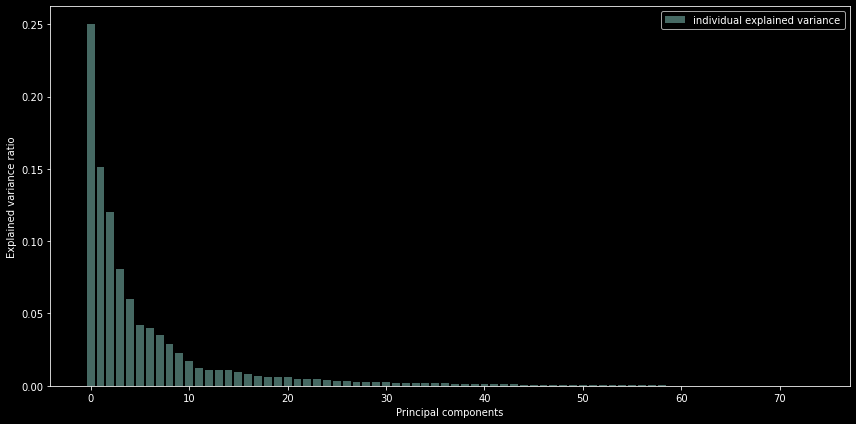

In [89]:
# with plt.style.context('dark_background'):
#     plt.figure(figsize=(12, 6))

#     plt.bar(range(74), explained_variance, alpha=0.5, align='center',label='individual explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()

In [90]:
xtrain_ = rd_xtrain[:, :20]
xtest_ = rd_xtest[:, :20]

In [92]:
xtrain_.shape, xtest_.shape

((27501, 20), (3056, 20))

****

In [105]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(min_samples_split=15)
Rf.fit(xtrain_, ytrain)
ypred=Rf.predict(xtest_)

RandomForestRegressor(min_samples_split=15)

In [109]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, ypred)

0.03363171243636248

In [ ]:
Rf.fit(xtest_, ytest)

In [124]:
y_pred4 = Rf.predict(x_test) 
y_pred_original4 = mms.inverse_transform(y_pred4.reshape(-1,1))
y_pred_original4=y_pred_original4.tolist()
y_pred_original4=[i[0] for i in y_pred_original4]

In [138]:
submission = pd.DataFrame({'Place_ID X Date	': Id,'target': y_pred_original4})
submission.to_csv('submission4.csv', index=False)

****

****

In [141]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [151]:
regressor = Sequential()
regressor.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))

In [152]:
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [144]:
regressor.fit(xtrain_,ytrain,epochs=250,batch_size=15)

2022-07-22 10:43:41.793757: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250
1834/1834 [==============================] - 6s 2ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 2/250
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 3/250
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0328 - mean_absolute_error: 0.0328
Epoch 4/250
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 5/250
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0313 - mean_absolute_error: 0.0313
Epoch 6/250
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0306 - mean_absolute_error: 0.0306
Epoch 7/250
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0301 - mean_absolute_error: 0.0301
Epoch 8/250
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0295 - mean_absolute_error: 0.0295
Epoch 9/250
1834/1834 [==============================] - 4s 2ms/step - loss: 0.0290 - me

In [145]:
# y_pred2 = regressor.predict(x_test) 
# y_pred_original2 = mms.inverse_transform(y_pred2.reshape(-1,1))
# y_pred_original2=y_pred_original2.tolist()
# y_pred_original2=[i[0] for i in y_pred_original2]

In [149]:
# submission = pd.DataFrame({'Place_ID X Date	': Id,'target': y_pred_original2})
# submission.to_csv('submission2.csv', index=False)

****

In [153]:
# regressor.fit(X_train,y_train,epochs=250,batch_size=15)

Epoch 1/250
2038/2038 [==============================] - 5s 2ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 2/250
2038/2038 [==============================] - 5s 2ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 3/250
2038/2038 [==============================] - 4s 2ms/step - loss: 0.0147 - mean_absolute_error: 0.0147
Epoch 4/250
2038/2038 [==============================] - 5s 2ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 5/250
2038/2038 [==============================] - 4s 2ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 6/250
2038/2038 [==============================] - 5s 2ms/step - loss: 0.0136 - mean_absolute_error: 0.0136
Epoch 7/250
2038/2038 [==============================] - 5s 2ms/step - loss: 0.0134 - mean_absolute_error: 0.0134
Epoch 8/250
2038/2038 [==============================] - 4s 2ms/step - loss: 0.0132 - mean_absolute_error: 0.0132
Epoch 9/250
2038/2038 [==============================] - 5s 2ms/step - loss: 0.0131 - me

In [155]:
# y_pred3 = regressor.predict(X_test) 
# y_pred_original3 = mms.inverse_transform(y_pred3.reshape(-1,1))
# y_pred_original3=y_pred_original3.tolist()
# y_pred_original3=[i[0] for i in y_pred_original3]

In [ ]:
# submission = pd.DataFrame({'Place_ID X Date	': Id,'target': y_pred_original3})
# submission.to_csv('submission3.csv', index=False)

****